# Drilling down on Block RNN for every site

In this notebook, I transported some of my work from explore.ipynb but tried to do a tad more cleaning.

In [1]:
import pandas as pd
from darts import TimeSeries
import numpy as np
import os
from utils import train_models, make_stitched_series
import matplotlib.pyplot as plt


os.environ["CUDA_VISIBLE_DEVICES"] = "1"
targets = pd.read_csv("aquatics-targets.csv.gz")

Trying to bring in weather covariates below. Have been too distracted by other things to play more here.

In [5]:
import polars as pl
import pyarrow.dataset as ds
 
date = "2020-09-24"
bucket = "bio230014-bucket01"
path = "neon4cast-drivers/noaa/gefs-v12/stage1"
endpoint = "https://sdsc.osn.xsede.org"
 
dataset = ds.dataset(f"s3://{bucket}/{path}?endpoint_override={endpoint}")

df = pl.scan_pyarrow_dataset(dataset)

In [9]:
df

The cell below will no longer work, as I changed a function in utils that `train_models` uses. But gist here was to train model for every time series at a site using the other recorded time series as covariates.

In [2]:
output = train_models("BARC", targets)

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().
You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame

Looking at the trained models for a site

In [4]:
def plot_predictions(variable, output):
    plt.clf()
    model_0 = output[variable][0]
    val_set = output[variable][1]
    covs = output[variable][2]
    predictions = model_0.predict(n=len(val_set), past_covariates=covs, num_samples=50)
    predictions.plot()
    val_set.plot(label="truth")
    plt.show()

In [ ]:
output_sites

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

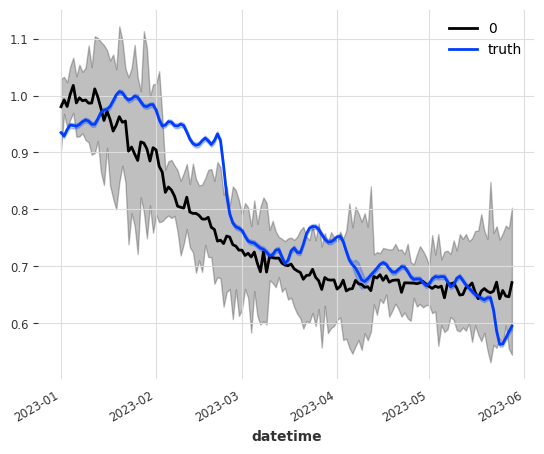

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

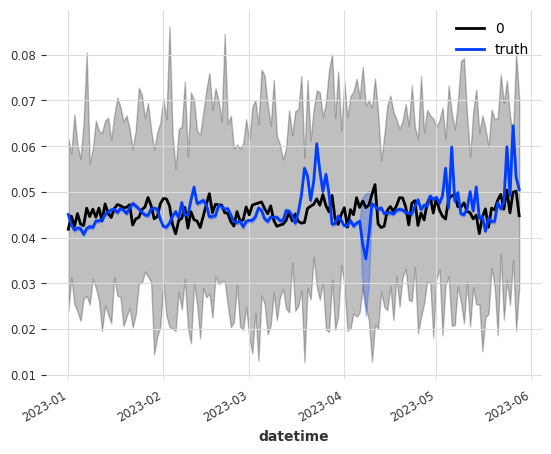

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]


Predicting: 0it [00:00, ?it/s]

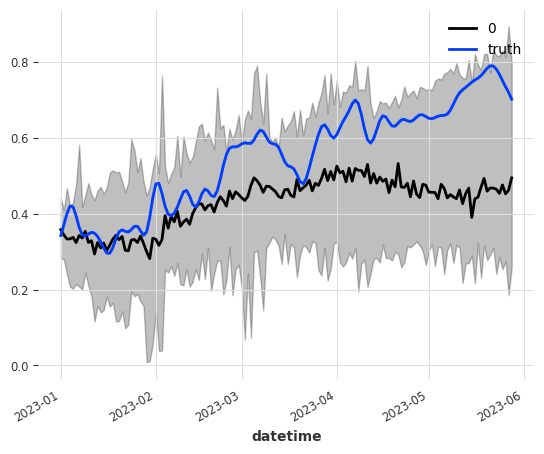

In [8]:
plot_predictions("oxygen", output)
plot_predictions("chla", output)
plot_predictions("temperature", output)